In [1]:
from signed_permutations import *

In [2]:
num_char_tables = 27
%store -r char_table_list
%store -r proportions_list

# Code for generating symmetric character table

In [3]:

# # BUGGY - self-conjugate partitions not on the center get duplicated, I think, which is weird.  
# n = 6

# def generate_symm_partitions(n) : 
#   partitions = list(Partitions(n))
#   num_partitions = len(partitions)

#   #rearranging partitions so that partitions[num_partitions - 1 - i].conjugate = partitions[i]
#   for i in range(num_partitions) : 
#       partitions[i] = Partition(partitions[num_partitions - 1 - i]).conjugate()

#   return partitions

In [4]:
# col_header_string = str(partitions[0])
# for i in range(1, num_partitions) : 
#     col_header_string +=  ' & ' + str(partitions[i])
# col_header_string

# Code for finding the character tables mod 4,5,7,9 & plots


In [5]:
# function that returns a character table for S_n whose rows are symmetric about the center, mod 4
def nth_symm_chartable(n) : 
    partitions = list(Partitions(n))
    num_partitions = len(partitions)

#     for i in range(num_partitions) : 
#         partitions[i] = Partition(partitions[num_partitions - 1 - i]).conjugate()

    return matrix(ZZ, [[symmetrica.charvalue(irred, cls) for cls in Partitions(n)] for irred in Partitions(n)])

char_table_list = []
for n in range(1, num_char_tables + 1) : 
    char_table_list.append(nth_symm_chartable(n))


In [7]:
# residue calculator returns the list of the numbers 
def residue_calculator(n, m) : 
  A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
  num_entries = len(A.columns())**2 
  residues_list = [0 for i in range(m)] 
  count = 0 
  for j in A : 
      for k in j : 
          residues_list[k] += 1
  for i in range(m) : 
    residues_list[i] = residues_list[i] / num_entries
  return residues_list 

proportions_list = []

# fills the residues list - each item of the list, from n = 1 to n = num_symm_groups
for n in range(num_char_tables) : 
  single_prop_list = []
  for m in [4,5,6,7,8,9] :
#   for m in [4] :
    single_prop_list.append(residue_calculator(n, m))
  proportions_list.append(single_prop_list)




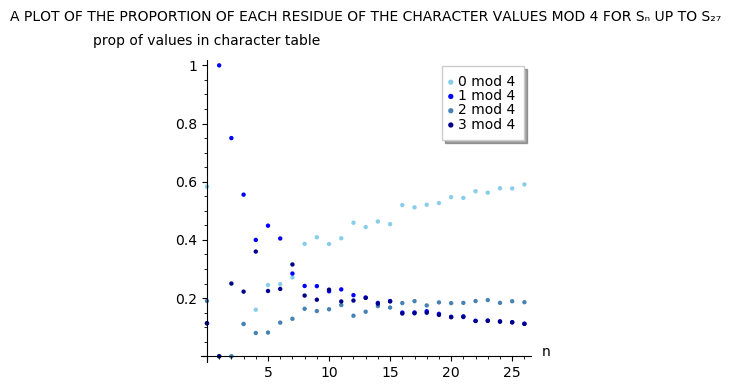

In [12]:
# calculates the residues for m = 4, up to n = num_char_tables
n = num_char_tables
m = 4

SUB = str.maketrans("0123456789n", "₀₁₂₃₄₅₆₇₈₉ₙ")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'skyblue', legend_label = '0 mod 4')
P1 = points([(i,  proportions_list[i][m - 4][1]) for i in range(n)], color = 'blue', legend_label = '1 mod 4')
P2 = points([(i,  proportions_list[i][m - 4][2]) for i in range(n)], color = 'steelblue', legend_label = '2 mod 4')
P3 = points([(i,  proportions_list[i][m - 4][3]) for i in range(n)], color = 'darkblue', legend_label = '3 mod 4')
P = P0 + P1 + P2 + P3
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1, title= 'A PLOT OF THE PROPORTION OF EACH RESIDUE OF THE CHARACTER VALUES MOD 4 FOR ' + 'Sn'.translate(SUB) + ' UP TO ' + 'S27'.translate(SUB), title_pos = (0.5, 1.1), show_legend = true, legend_markerscale = 1.2)



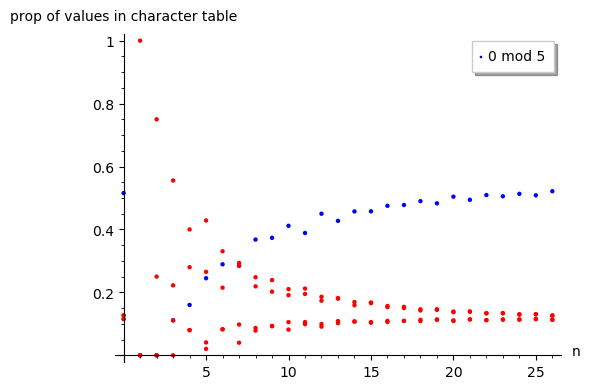

In [8]:
# calculates the residues for m = 5, up to n = num_char_tables
n = num_char_tables
m = 5
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue', legend_label = '0 mod 5')
P = P0
# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

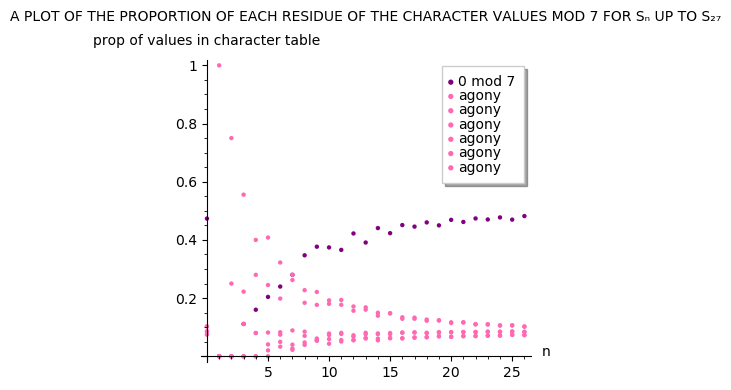

In [9]:
# calculates the residues for m = 7, up to n = num_char_tables
n = num_char_tables
m = 7
SUB = str.maketrans("0123456789n", "₀₁₂₃₄₅₆₇₈₉ₙ")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'purple', legend_label = '0 mod 7')
P = P0
# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'hotpink', legend_label = 'agony')
  
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1,title= 'A PLOT OF THE PROPORTION OF EACH RESIDUE OF THE CHARACTER VALUES MOD 7 FOR ' + 'Sn'.translate(SUB) + ' UP TO ' + 'S27'.translate(SUB), title_pos = (0.5, 1.1), show_legend = true, legend_markerscale = 1.2)



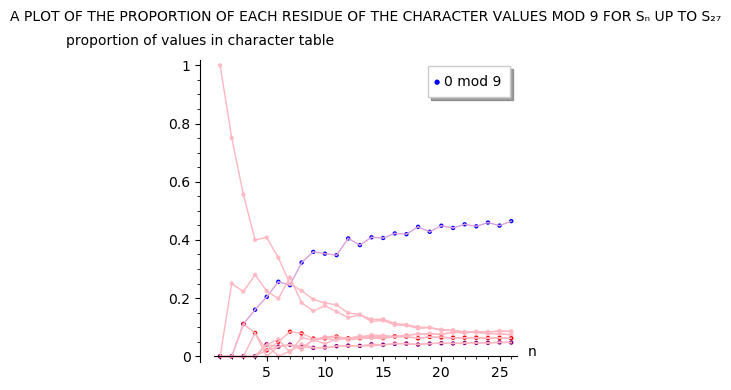

In [10]:
# calculates the residues for m = 9, up to n = 24
n = num_char_tables
m = 9
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(1, n)], color = 'blue', legend_label = '0 mod 9')
P = P0

# weird translation for sub and superscripts
SUB = str.maketrans("0123456789n", "₀₁₂₃₄₅₆₇₈₉ₙ")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

# non 0, 3, or 6 mod 9 data point plots
for j in range(1, m) : 
  if j == 2 or j == 5: 
    "rip the finagling"
  else : 
    P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(1, n)], color = 'pink')
    
# this is 3 mod 9 
P = P + points([(i,  proportions_list[i][m - 4][2]) for i in range(1, n)], color = 'red')

# this is 6 mod 9 
P = P + points([(i,  proportions_list[i][m - 4][5]) for i in range(1, n)], color = 'purple')

var('a,b')
model(x) = a*x+b

for i in range(m) : 
  for j in range(1, n - 1) :
    if i == 0 : 
      # 0 mod 9 line connections
      P = P + line([(j, proportions_list[j][m - 4][i]), (j + 1, proportions_list[j + 1][m - 4][i])], color = 'plum')
    else : 
      # everything else mod 9 line connections 
      P = P + line([(j, proportions_list[j][m - 4][i]), (j + 1, proportions_list[j + 1][m - 4][i])], color = 'lightpink')

P.show(axes_labels = ("n", "proportion of values in character table"), axes_labels_size = 1, title= 'A PLOT OF THE PROPORTION OF EACH RESIDUE OF THE CHARACTER VALUES MOD 9 FOR ' + 'Sn'.translate(SUB) + ' UP TO ' + 'S27'.translate(SUB), title_pos = (0.5, 1.1), legend_markerscale = 1.2)



# Me screwing around with trying to save the character tables

In [11]:
import dill

ModuleNotFoundError: No module named 'dill'

In [78]:
# dill.dump_session('notebook_env.db')
%who

P	 P0	 P1	 P2	 P3	 SUB	 SUP	 a	 b	 
char_table_list	 csv	 dill	 generate_symm_partitions	 i	 j	 m	 mod_column_equivalence	 model	 
n	 nth_symm_chartable	 num_char_tables	 print_equiv_columns	 proportions_list	 residue_calculator	 single_prop_list	 symm_column_equivalences	 


In [16]:
%store

Stored variables and their in-db values:
char_table_list              -> [[1], [ 1  1]
[-1  1], [ 1  1  1]
[-1  0  2]
[ 1 -
proportions_list             -> [[[5282121/9060100, 257316/2265025, 9843/51772, 10


In [13]:
%store char_table_list
%store proportions_list

Stored 'char_table_list' (list)
Stored 'proportions_list' (list)


In [3]:
%store -r char_table_list
%store -r proportions_list

no stored variable or alias proportions_list


In [ ]:
print(char_table_list)
proportions_list

# Function for sorting columns of matrices identical mod m


In [29]:
matrix(ZZ.quotient(2), char_table_list[3 - 1])

[1 1 1]
[1 0 0]
[1 1 1]

In [37]:
# generates a double list whose elements are lists of columns of S_n 
# which are equivalent mod m

# def symm_column_equivalences(n, m) : 
#   A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
#   equivalence_list = dict(zip([i for i in range(len(A.columns()))], [[i] for i in Partitions(n)]))
#   for i in range(len(A.columns())) : 
#     for j in range(i + 1, len(A.columns())) : 
#       if (i in equivalence_list) and (j in equivalence_list) and mod_column_equivalence(A, i, j) : 
#         equivalence_list[i] = equivalence_list[i] + equivalence_list[j]
#         del equivalence_list[j]
#   return equivalence_list

# returns true if col1 and col2 of the nth symmetric character table 
# A is the matrix in question
def column_equiv(A, col1, col2) :
  return A.columns()[col1] == A.columns()[col2]

  

def symm_column_equivalences(n, m) : 
  '''
  generates a double list whose elements are lists of columns of S_n equivalent mod m
  VERSION 2, with graphs!
  this function is implicitly assuming that char_table_list is a list of character tables
  whose columns correspond to the elements of partition_list - so they're the same size and in the right order

  REQUIRES: n, m \geq 0 
  ENSURES: symm_column_equivalences(n, m) returns a list whose elements are lists of each of the equivalent columns
  of the character table 
  '''
  G = Graph()
  A = matrix(ZZ.quotient(m), char_table_list[n - 1])
  partition_list = Partitions(n)
  for i, x in enumerate(partition_list) : 
    for j, y in enumerate(partition_list):
      if (not i == j) and column_equiv(A, i, j) : 
        G.add_edge((x, y))
  return G.connected_components()

def print_equiv_columns(n, m) :
  X = symm_column_equivalences(n, m)
  print("list of partitions whose columns in the character table of S_" + str(n) + " are congruent mod " + str(m))
  for i in X : 
    print(i)

m = 4
for i in range(1, num_char_tables) :
  print_equiv_columns(i, m)



list of partitions whose columns in the character table of S_1 are congruent mod 4
list of partitions whose columns in the character table of S_2 are congruent mod 4
list of partitions whose columns in the character table of S_3 are congruent mod 4
list of partitions whose columns in the character table of S_4 are congruent mod 4
[[1, 1, 1, 1], [2, 2]]
list of partitions whose columns in the character table of S_5 are congruent mod 4
[[1, 1, 1, 1, 1], [2, 2, 1]]
list of partitions whose columns in the character table of S_6 are congruent mod 4
[[2, 1, 1, 1, 1], [2, 2, 2]]
[[1, 1, 1, 1, 1, 1], [2, 2, 1, 1]]
list of partitions whose columns in the character table of S_7 are congruent mod 4
[[3, 1, 1, 1, 1], [3, 2, 2]]
[[2, 1, 1, 1, 1, 1], [2, 2, 2, 1]]
[[1, 1, 1, 1, 1, 1, 1], [2, 2, 1, 1, 1]]
list of partitions whose columns in the character table of S_8 are congruent mod 4
[[1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 1, 1, 1, 1], [2, 2, 2, 2], [4, 4]]
[[4, 1, 1, 1, 1], [4, 2, 2]]
[[3, 1, 1, 1, 1, 